# Physics Applications Part 3

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint

## 1. Euler-Cromer vs Runge-Kutta

### a

Euler-Cromer Method
Theta:[0.52359878 0.52354642 0.5234417  0.52328464 0.52307526]
Omega:[ 0.         -0.00523599 -0.01047145 -0.01570587 -0.02093872]
t:[0.   0.01 0.02 0.03 0.04]


2nd Order Runge-Kutta Method
Theta:[0.52359878 0.5235726  0.52349406 0.52336317 0.52317994]
Omega:[ 0.         -0.00523599 -0.01047145 -0.01570587 -0.02093872]
t:[0.   0.01 0.02 0.03 0.04]


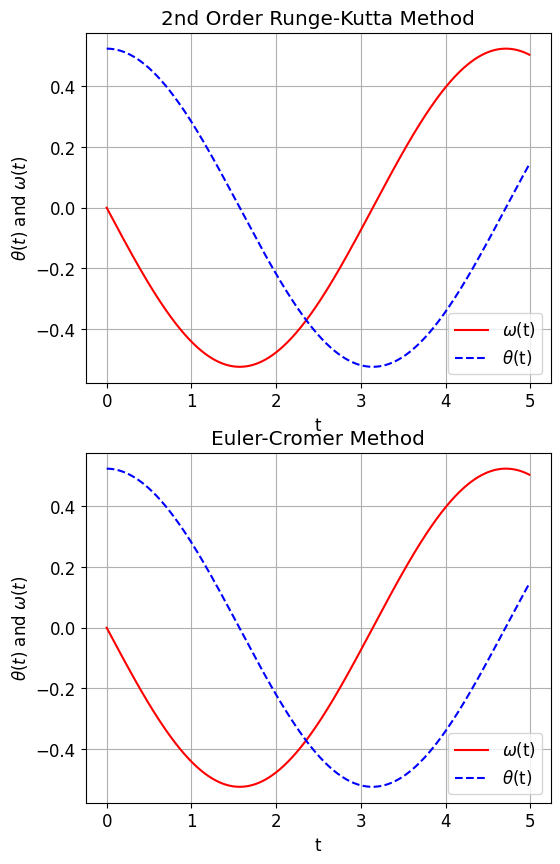

In [2]:
a=0
b=5
N=500
h=(b-a)/N 
tpoints=np.arange(a,b,h)
theta0=np.pi/6
omega0=0
g=9.81
l=9.81
gl=g/l
theta_ec=np.zeros(N) #Euler-Cromer Arrays
omega_ec=np.zeros(N)
theta_ec[0]=theta0
omega_ec[0]=omega0
theta_rk=np.zeros(N) #2nd Order Runge-Kutta Arrays
omega_rk=np.zeros(N)
theta_rk[0]=theta0
omega_rk[0]=omega0

#Euler-cromer Method
for i in range(1,N):
  omega_ec[i] += omega_ec[i-1] + h*(-gl)*theta_ec[i-1]
  theta_ec[i] += theta_ec[i-1] + h*omega_ec[i]

print('Euler-Cromer Method')    
print(f'Theta:{theta_ec[0:5]}\nOmega:{omega_ec[0:5]}\nt:{tpoints[0:5]}')
print('\n')

#2nd Order Runge-Kutta Method
for j in range(1,N):
  thetamid = theta_rk[j-1]+(h/2)*omega_rk[j-1]
  omegamid = omega_rk[j-1]+(h/2)*(-gl)*theta_rk[j-1] 
  theta_rk[j] += theta_rk[j-1] + h*omegamid
  omega_rk[j] += omega_rk[j-1] + h*(-gl)*thetamid

print('2nd Order Runge-Kutta Method')    
print(f'Theta:{theta_rk[0:5]}\nOmega:{omega_rk[0:5]}\nt:{tpoints[0:5]}')

plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(tpoints, omega_rk, 'r-', label = r'$\omega$(t)')
plt.plot(tpoints, theta_rk, 'b--', label = r'$\theta$(t)')
plt.title('2nd Order Runge-Kutta Method')
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$ and $\omega(t)$')
plt.grid()
plt.legend()

plt.subplot(212)
plt.plot(tpoints, omega_ec, 'r-', label = r'$\omega$(t)')
plt.plot(tpoints,theta_ec, 'b--', label = r'$\theta$(t)')
plt.title('Euler-Cromer Method')
plt.xlabel('t')
plt.ylabel(r'$\theta(t)$ and $\omega(t)$')
plt.grid()
plt.legend()


### b

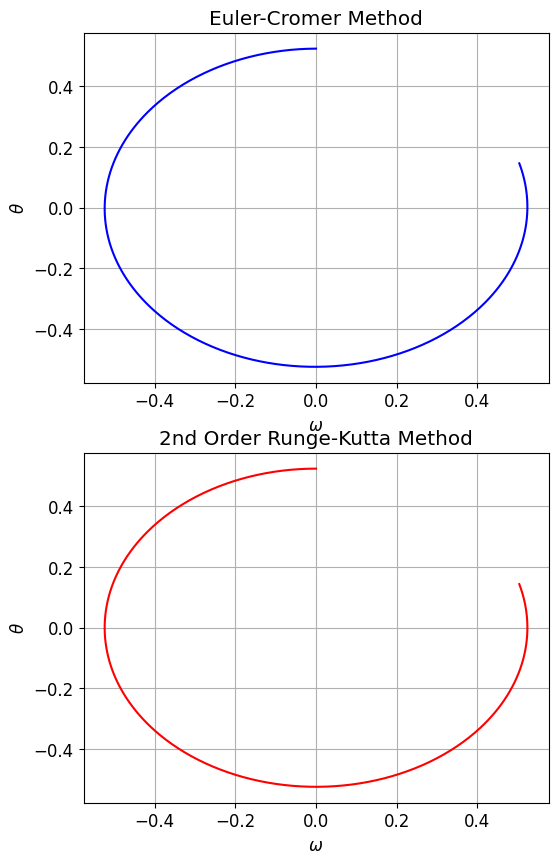

In [3]:
plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(omega_ec, theta_ec, 'b-')
plt.title('Euler-Cromer Method')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\theta$')
plt.grid()

plt.subplot(212)
plt.plot(omega_rk, theta_rk, 'r-')
plt.title('2nd Order Runge-Kutta Method')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\theta$')
plt.grid()

### c

$K=\frac{1}{2}m\omega^2\\
U=\frac{1}{2}gθ^2\\
Total=K+U$


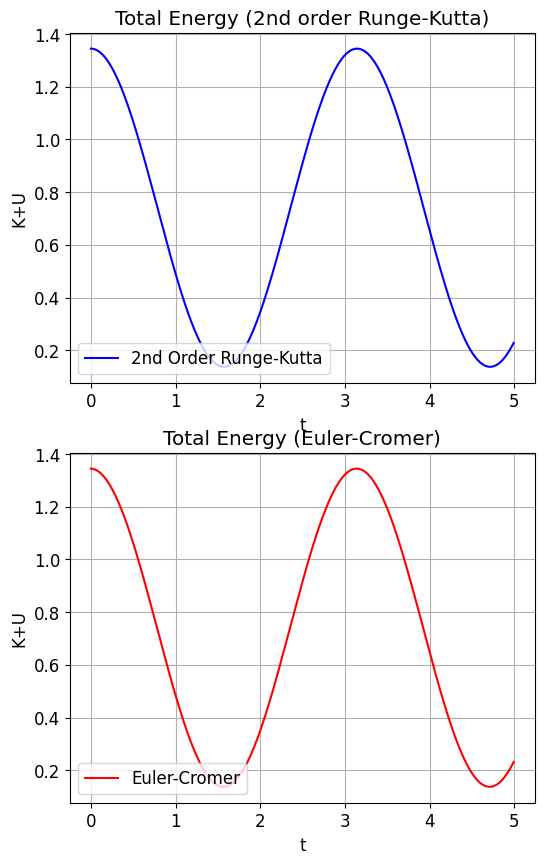

In [4]:
#Total Energy Runge-Kutta
kinetic_rk=0.5*gl*omega_rk**2
potential_rk=0.5*g*theta_rk**2
total_rk=kinetic_rk+potential_rk

#Total Energy Euler-Cromer
kinetic_ec=0.5*gl*omega_ec**2
potential_ec=0.5*g*theta_ec**2
total_ec=kinetic_ec+potential_ec

plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(tpoints,total_rk, 'b-', label = '2nd Order Runge-Kutta')
plt.title('Total Energy (2nd order Runge-Kutta)')
plt.xlabel('t')
plt.ylabel('K+U')
plt.legend(loc='lower left')
plt.grid()  

plt.subplot(212)
plt.plot(tpoints, total_ec, 'r-', label = 'Euler-Cromer')
plt.title('Total Energy (Euler-Cromer)')
plt.xlabel('t')
plt.ylabel('K+U')
plt.legend(loc='lower left')
plt.grid()   

## 2. Nonlinear Pendulum

### a

2nd Order Runge-Kutta Method
Theta:[0.         0.01       0.01999902 0.02999608 0.0399902 ]
Omega:[1.         0.999951   0.99980401 0.99955905 0.99921618]
t:[0.   0.01 0.02 0.03 0.04]


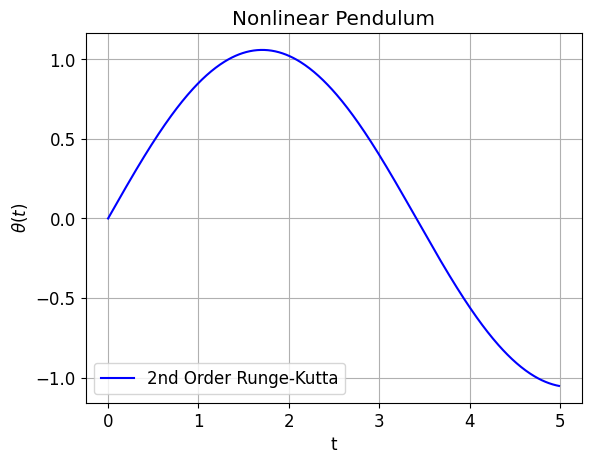

In [5]:
a=0
b=5
N=500
h=(b-a)/N 
tpoints=np.arange(a,b,h)
theta0=0
omega0=1
gl=0.98
theta_rk=np.zeros(N) #2nd Order Runge-Kutta Arrays
omega_rk=np.zeros(N)
theta_rk[0]=theta0
omega_rk[0]=omega0

#2nd Order Runge-Kutta Method
for j in range(0,N):
  thetamid = theta_rk[j-1]+(h/2)*omega_rk[j-1]
  omegamid = omega_rk[j-1]+(h/2)*(-gl)*np.sin(theta_rk[j-1]) 
  theta_rk[j] += theta_rk[j-1] + h*omegamid
  omega_rk[j] += omega_rk[j-1] + h*(-gl)*np.sin(thetamid)

print('2nd Order Runge-Kutta Method')    
print(f'Theta:{theta_rk[0:5]}\nOmega:{omega_rk[0:5]}\nt:{tpoints[0:5]}')

plt.plot(tpoints, theta_rk, 'b-', label = '2nd Order Runge-Kutta')
plt.title('Nonlinear Pendulum')
plt.xlabel('t')
plt.ylabel(r'$\theta (t)$')
plt.legend(loc='lower left')
plt.grid()

### b

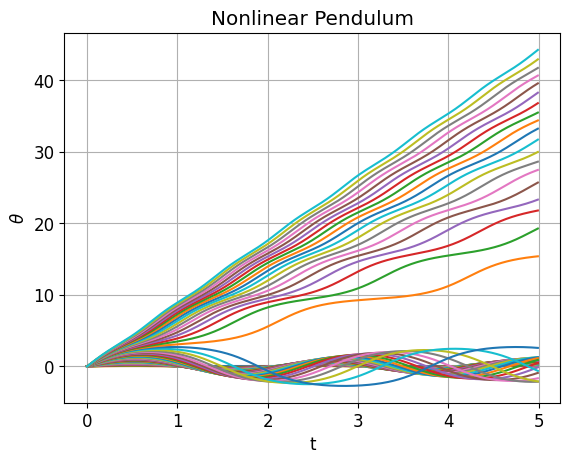

In [6]:
def f(variables,t):
  theta,omega = variables
  g=9.8
  l=1
  gl=g/l
  dthetadt = omega
  domegadt = -gl*np.sin(theta)
  return dthetadt, domegadt

#2nd Order Runge-Kutta Method
for omega0 in np.linspace(0,10,50):
  a=0   
  b=5
  N=500
  h=(b-a)/N 
  tpoints=np.arange(a,b,h)
  theta0=0
  theta_rk=np.zeros(N) #2nd Order Runge-Kutta Arrays
  theta_rk[0]=theta0
  omega_rk=np.zeros(N)
  omega_rk[0]=omega0
 #2nd Order Runge-Kutta Method
  for j in range(1,N):
    variables = [theta0,omega0]
    time = h*(j-1)
    thetamid = theta0 + (h/2)*f(variables, time)[0]
    omegamid = omega0 + (h/2)*f(variables, time)[1]
    tmid = time + (h/2)
    thetaomegamid = [thetamid,omegamid]
    theta_rk[j] = theta0 + h*f(thetaomegamid,tmid)[0]
    omega_rk[j] = omega0 + h*f(thetaomegamid,tmid)[1]
    theta0,omega0 = theta_rk[j],omega_rk[j]
  plt.plot(tpoints, theta_rk)
plt.title('Nonlinear Pendulum')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid() 
plt.show() 

### c

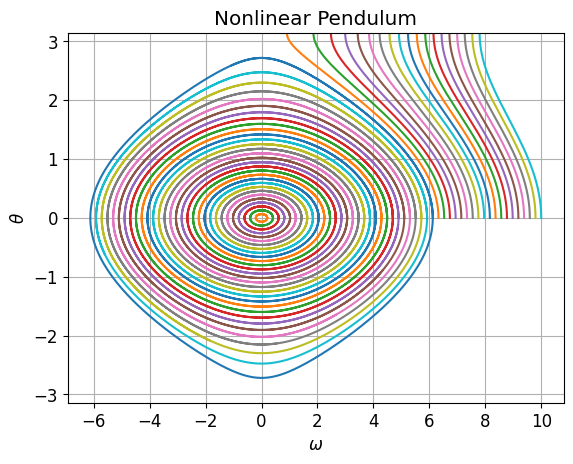

In [7]:
def f(variables,t):
  theta,omega = variables
  g=9.8
  l=1
  gl=g/l
  dthetadt = omega
  domegadt = -gl*np.sin(theta)
  return dthetadt, domegadt

#2nd Order Runge-Kutta Method
for omega0 in np.linspace(0,10,50):
  a=0   
  b=5
  N=500
  h=(b-a)/N 
  tpoints=np.arange(a,b,h)
  theta0=0
  theta_rk=np.zeros(N) #2nd Order Runge-Kutta Arrays
  theta_rk[0]=theta0
  omega_rk=np.zeros(N)
  omega_rk[0]=omega0
 #2nd Order Runge-Kutta Method
  for j in range(1,N):
    variables = [theta0,omega0]
    time = h*(j-1)
    thetamid = theta0 + (h/2)*f(variables, time)[0]
    omegamid = omega0 + (h/2)*f(variables, time)[1]
    tmid = time + (h/2)
    thetaomegamid = [thetamid,omegamid]
    theta_rk[j] = theta0 + h*f(thetaomegamid,tmid)[0]
    omega_rk[j] = omega0 + h*f(thetaomegamid,tmid)[1]
    theta0,omega0 = theta_rk[j],omega_rk[j]
  plt.plot(omega_rk, theta_rk)
plt.title('Nonlinear Pendulum')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\theta$')
plt.ylim(-np.pi,np.pi)
plt.grid() 
plt.show() 

## 3. An anharmonic oscillator.

### a

2nd Order Runge-Kutta Method
x:[0.       0.01     0.019999 0.029996 0.03999 ]
v:[1.         0.99995    0.9998     0.99955002 0.99920008]
t:[0.   0.01 0.02 0.03 0.04]


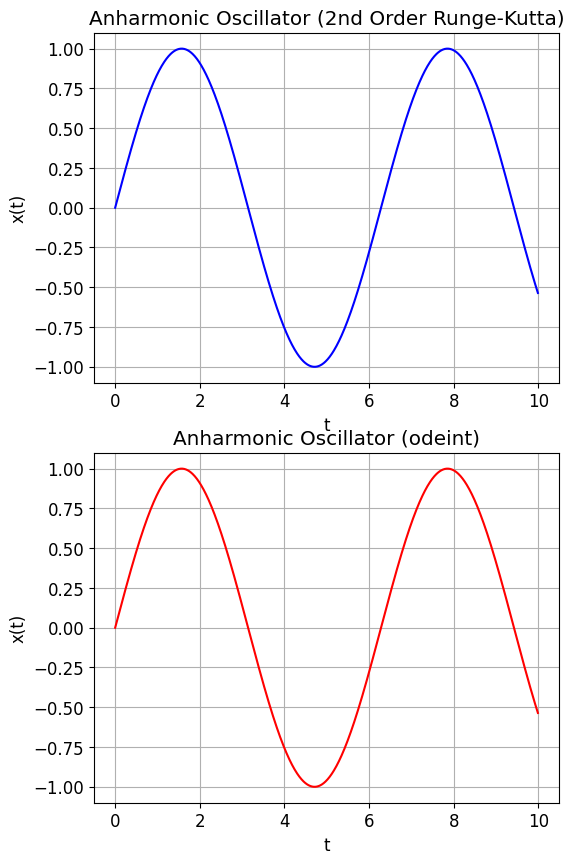

In [8]:
def f(variables,t):
  x,v=variables
  dvdt=(-k*x*(1+(x/xa)**10))/m
  dxdt=v
  return dxdt,dvdt

a=0
b=10
N=1000
h=(b-a)/N 
tpoints=np.arange(a,b,h)
x0=0
v0=1
m=1
k=1
xa=100
x=np.zeros(N)
v=np.zeros(N)
x[0] = x0
v[0] = v0
solution = odeint(f,(x0,v0),tpoints)

#2nd Order Runge-Kutta Method
for j in range(1,N):
  variables = [x0,v0]
  time = h*(j-1)
  xmid = x0 + (h/2)*f(variables, time)[0]
  vmid = v0 + (h/2)*f(variables, time)[1]
  tmid = time + (h/2)
  xvmid = [xmid,vmid]
  x[j] = x0 + h*f(xvmid,tmid)[0]
  v[j] = v0 + h*f(xvmid,tmid)[1]
  x0,v0 = x[j],v[j]

print('2nd Order Runge-Kutta Method')    
print(f'x:{x[0:5]}\nv:{v[0:5]}\nt:{tpoints[0:5]}')

plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(tpoints,x, 'b-')
plt.title('Anharmonic Oscillator (2nd Order Runge-Kutta)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid() 

plt.subplot(212)
plt.plot(tpoints,solution[:,0], 'r-')
plt.title('Anharmonic Oscillator (odeint)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid() 

### b

2nd Order Runge-Kutta Method
x:[0.       0.01     0.019999 0.029996 0.03999 ]
v:[1.         0.99995    0.9998     0.99955002 0.99920008]
t:[0.   0.01 0.02 0.03 0.04]


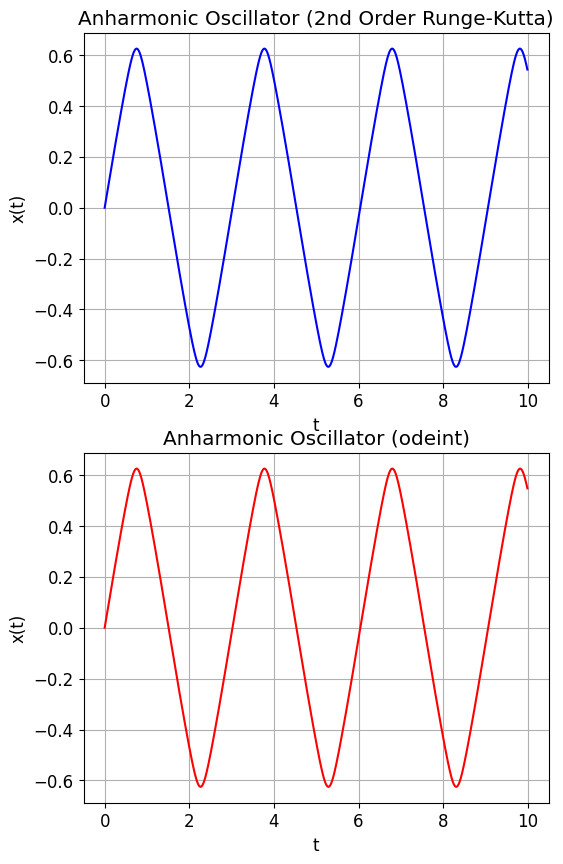

In [9]:
def f(variables,t):
  x,v=variables
  dvdt=(-k*x*(1+(x/xa)**10))/m
  dxdt=v
  return dxdt,dvdt

a=0
b=10
N=1000
h=(b-a)/N 
tpoints=np.arange(a,b,h)
x0=0
v0=1
m=1
k=1
xa=0.5
x=np.zeros(N)
v=np.zeros(N)
x[0] = x0
v[0] = v0
solution = odeint(f,(x0,v0),tpoints)

#2nd Order Runge-Kutta Method
for j in range(1,N):
  variables = [x0,v0]
  time = h*(j-1)
  xmid = x0 + (h/2)*f(variables, time)[0]
  vmid = v0 + (h/2)*f(variables, time)[1]
  tmid = time + (h/2)
  xvmid = [xmid,vmid]
  x[j] = x0 + h*f(xvmid,tmid)[0]
  v[j] = v0 + h*f(xvmid,tmid)[1]
  x0,v0 = x[j],v[j]

print('2nd Order Runge-Kutta Method')    
print(f'x:{x[0:5]}\nv:{v[0:5]}\nt:{tpoints[0:5]}')

plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(tpoints,x, 'b-')
plt.title('Anharmonic Oscillator (2nd Order Runge-Kutta)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid() 

plt.subplot(212)
plt.plot(tpoints,solution[:,0], 'r-')
plt.title('Anharmonic Oscillator (odeint)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid() 

## 4. Rabbits and Foxes


### a

2nd Order Runge-Kutta Method
x:[2.         2.0001     2.00039803 2.00089218 2.00158059]
v:[2.         1.9801     1.96039997 1.94089978 1.92159925]
t:[0.   0.01 0.02 0.03 0.04]


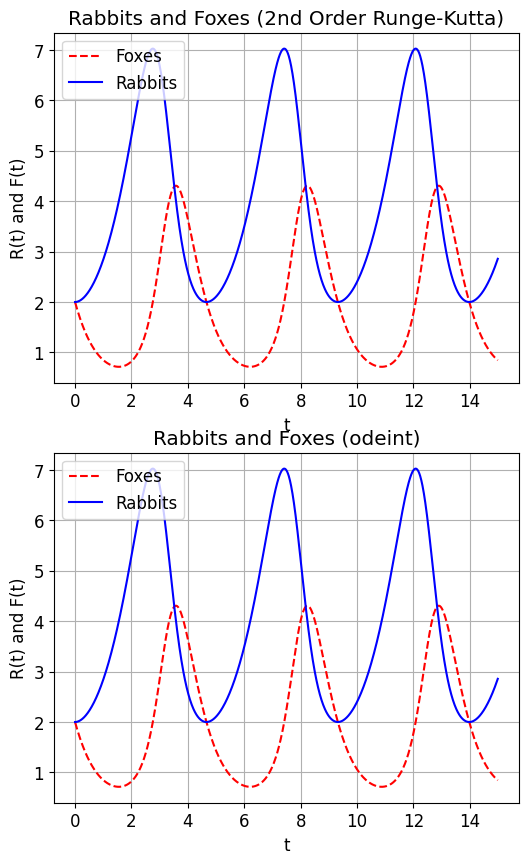

In [10]:
def f(variables,t):
  R,F=variables
  dRdt=alpha*R-beta*R*F
  dFdt=gamma*R*F-delta*F
  return dRdt,dFdt

a=0
b=15
N=1500
h=(b-a)/N 
tpoints=np.arange(a,b,h)
alpha=1
beta=0.5
gamma=0.5
delta=2
R0=2
F0=2
R=np.zeros(N)
F=np.zeros(N)
R[0] = R0
F[0] = F0

#scipy.integrate.odeint
solution=odeint(f,(R0,F0),tpoints)

#2nd Order Runge-Kutta Method
for j in range(1,N):
  variables = [R0,F0]
  time = h*(j-1)
  Rmid = R0 + (h/2)*f(variables, time)[0]
  Fmid = F0 + (h/2)*f(variables, time)[1]
  tmid = time + (h/2)
  RFmid = [Rmid,Fmid]
  R[j] = R0 + h*f(RFmid,tmid)[0]
  F[j] = F0 + h*f(RFmid,tmid)[1]
  R0,F0 = R[j],F[j]

print('2nd Order Runge-Kutta Method')    
print(f'x:{R[0:5]}\nv:{F[0:5]}\nt:{tpoints[0:5]}')

plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(tpoints,F, 'r--', label='Foxes')
plt.plot(tpoints,R, 'b-', label='Rabbits')
plt.title('Rabbits and Foxes (2nd Order Runge-Kutta)')
plt.xlabel('t')
plt.ylabel('R(t) and F(t)')
plt.grid()
plt.legend(loc = 'upper left') 


plt.subplot(212)
plt.plot(tpoints,solution[:,1], 'r--', label='Foxes')
plt.plot(tpoints,solution[:,0], 'b-', label='Rabbits')
plt.title('Rabbits and Foxes (odeint)')
plt.xlabel('t')
plt.ylabel('R(t) and F(t)')
plt.grid()
plt.legend(loc = 'upper left') 


###b

2nd Order Runge-Kutta Method
x:[2.         2.020301   2.04120611 2.06271981 2.08484688]
v:[2.         1.960499   1.92197612 1.88441    1.84777968]
t:[0.   0.01 0.02 0.03 0.04]


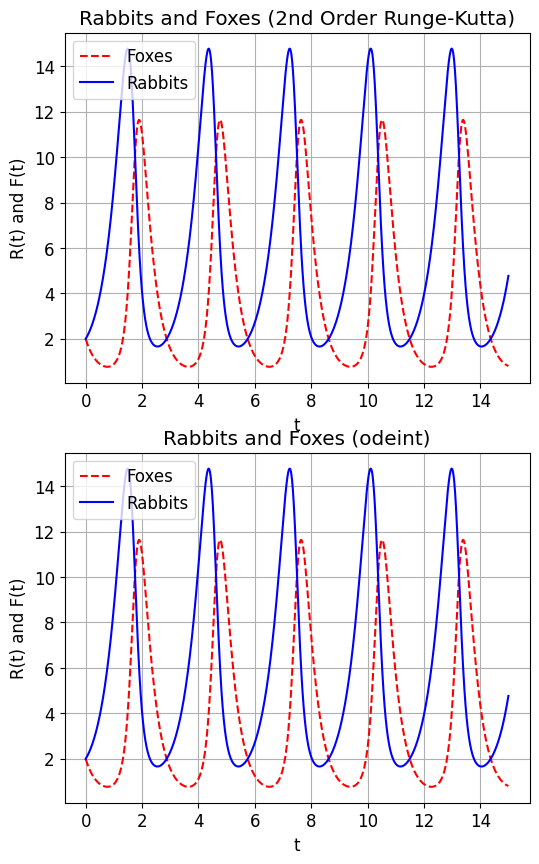

In [11]:
def f(variables,t):
  R,F=variables
  dRdt=alpha*R-beta*R*F
  dFdt=gamma*R*F-delta*F
  return dRdt,dFdt

a=0
b=15
N=1500
h=(b-a)/N 
tpoints=np.arange(a,b,h)
alpha=2     #Increased the level of alpha by 1
beta=0.5
gamma=0.5
delta=3     #Increased the level of delta by 1
R0=2
F0=2
R=np.zeros(N)
F=np.zeros(N)
R[0] = R0
F[0] = F0

#scipy.integrate.odeint
solution=odeint(f,(R0,F0),tpoints)

#2nd Order Runge-Kutta Method
for j in range(1,N):
  variables = [R0,F0]
  time = h*(j-1)
  Rmid = R0 + (h/2)*f(variables, time)[0]
  Fmid = F0 + (h/2)*f(variables, time)[1]
  tmid = time + (h/2)
  RFmid = [Rmid,Fmid]
  R[j] = R0 + h*f(RFmid,tmid)[0]
  F[j] = F0 + h*f(RFmid,tmid)[1]
  R0,F0 = R[j],F[j]

print('2nd Order Runge-Kutta Method')    
print(f'x:{R[0:5]}\nv:{F[0:5]}\nt:{tpoints[0:5]}')

plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(tpoints,F, 'r--', label='Foxes')
plt.plot(tpoints,R, 'b-', label='Rabbits')
plt.title('Rabbits and Foxes (2nd Order Runge-Kutta)')
plt.xlabel('t')
plt.ylabel('R(t) and F(t)')
plt.grid()
plt.legend(loc = 'upper left') 


plt.subplot(212)
plt.plot(tpoints,solution[:,1], 'r--', label='Foxes')
plt.plot(tpoints,solution[:,0], 'b-', label='Rabbits')
plt.title('Rabbits and Foxes (odeint)')
plt.xlabel('t')
plt.ylabel('R(t) and F(t)')
plt.grid()
plt.legend(loc = 'upper left') 

## 5. Orbit of a planet

### a

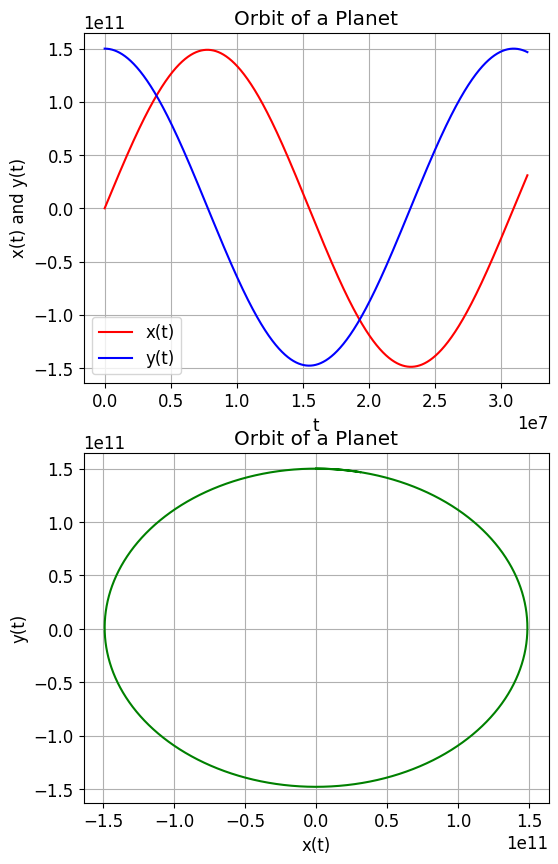

In [19]:
def f(variables,t):
  x,vx,y,vy = variables
  dvxdt = -(G*M*x)/np.sqrt(x**2+y**2)**3
  dxdt = vx
  dvydt = -(G*M*y)/np.sqrt(x**2+y**2)**3
  dydt = vy
  return dxdt,dvxdt,dydt,dvydt

a=0.0           
b=3.2*10.0**7.0
N=100000
h=(b-a)/N 
tpoints=np.arange(a,b,h)
m=6.0*10.0**24.0
M=2.0*10.0**30.0
G=6.8*10.0**(-11.0)
x0=0.0
y0=1.5*10.0**11.0
vx0=3.0*10.0**4.0
vy0=0.0
vars=[x0,vx0,y0,vy0]

solution=odeint(f,vars,tpoints)

plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(tpoints, solution[:,0],'r', label='x(t)')
plt.plot(tpoints, solution[:,2],'b', label='y(t)')
plt.title('Orbit of a Planet')
plt.xlabel('t')
plt.ylabel('x(t) and y(t)')
plt.grid()
plt.legend()

plt.subplot(212)
plt.plot(solution[:,0], solution[:,2],'g')
plt.title('Orbit of a Planet')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.grid()

### b

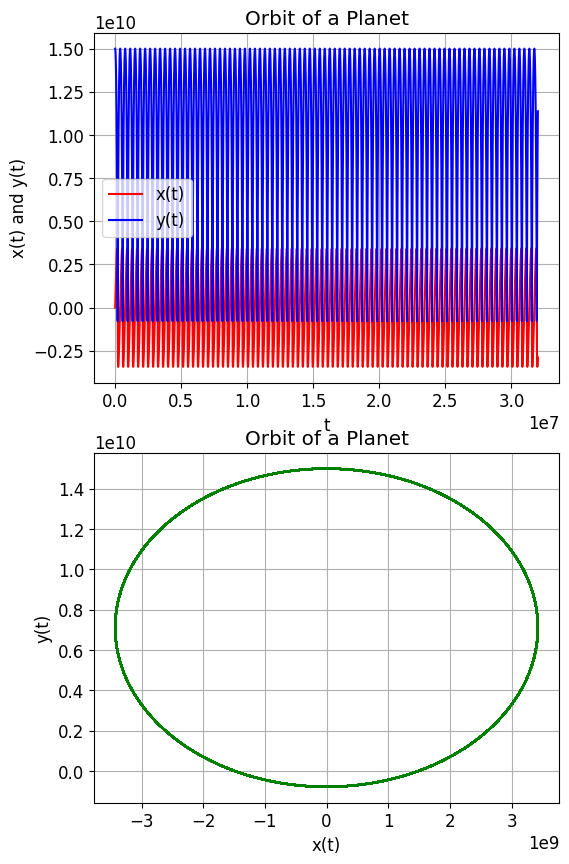

In [21]:
def f(variables,t):
  x,vx,y,vy = variables
  dvxdt = -(G*M*x)/np.sqrt(x**2+y**2)**3
  dxdt = vx
  dvydt = -(G*M*y)/np.sqrt(x**2+y**2)**3
  dydt = vy
  return dxdt,dvxdt,dydt,dvydt

a=0.0           
b=3.2*10.0**7.0
N=100000
h=(b-a)/N 
tpoints=np.arange(a,b,h)
m=6.0*10.0**24.0
M=2.0*10.0**30.0
G=6.8*10.0**(-11.0)
x0=0.0
y0=1.5*10.0**10.0
vx0=3.0*10.0**4.0 #brought it down by 2 powers
vy0=0.0
vars=[x0,vx0,y0,vy0]

solution=odeint(f,vars,tpoints)

plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(tpoints, solution[:,0],'r', label='x(t)')
plt.plot(tpoints, solution[:,2],'b', label='y(t)')
plt.title('Orbit of a Planet')
plt.xlabel('t')
plt.ylabel('x(t) and y(t)')
plt.grid()
plt.legend()

plt.subplot(212)
plt.plot(solution[:,0], solution[:,2],'g')
plt.title('Orbit of a Planet')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.grid()

###c

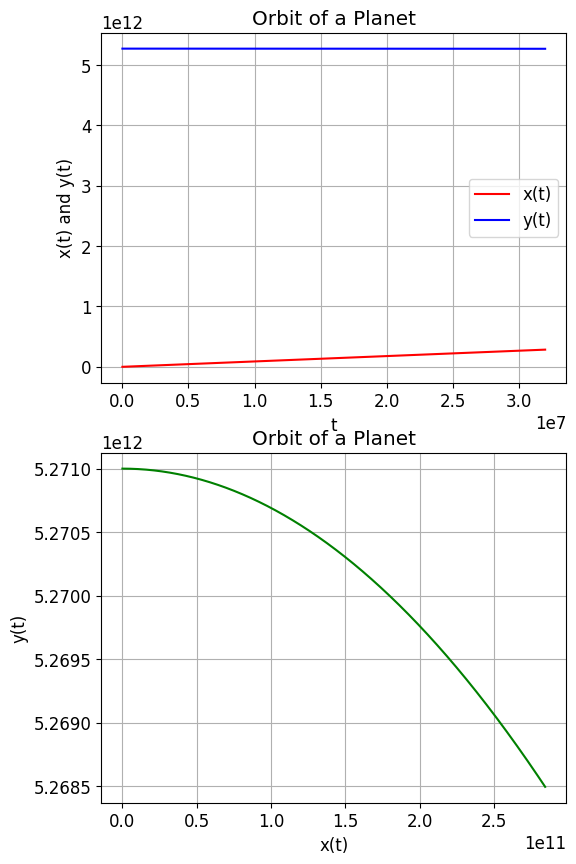

In [14]:
#https://en.wikipedia.org/wiki/Halley%27s_Comet

def f(variables,t):
  x,vx,y,vy = variables
  dvxdt = -(G*M*x)/np.sqrt(x**2+y**2)**3
  dxdt = vx
  dvydt = -(G*M*y)/np.sqrt(x**2+y**2)**3
  dydt = vy
  return dxdt,dvxdt,dydt,dvydt

a=0.0           
b=3.2*10.0**7.0
N=100000
h=(b-a)/N 
tpoints=np.arange(a,b,h)
m=6.0*10.0**24.0
M=2.0*10.0**30.0
G=6.8*10.0**(-11.0)
x0=0.0
y0=52.71*10.0**11.0 #i AU = 1.50*10**11m <=> 35.14 AU = 52.71*10**11m
vx0=0.889125*10.0**4.0 
vy0=0.0
vars=[x0,vx0,y0,vy0]

solution=odeint(f,vars,tpoints)

plt.figure(figsize=(6,10))
plt.rc('font', size=12)

plt.subplot(211)
plt.plot(tpoints, solution[:,0],'r', label='x(t)')
plt.plot(tpoints, solution[:,2],'b', label='y(t)')
plt.title('Orbit of a Planet')
plt.xlabel('t')
plt.ylabel('x(t) and y(t)')
plt.grid()
plt.legend()

plt.subplot(212)
plt.plot(solution[:,0], solution[:,2],'g')
plt.title('Orbit of a Planet')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.grid()

## 6. Comparing Exponential and Logistic Growth

### a

Enter 0.1, 1, or 10.1


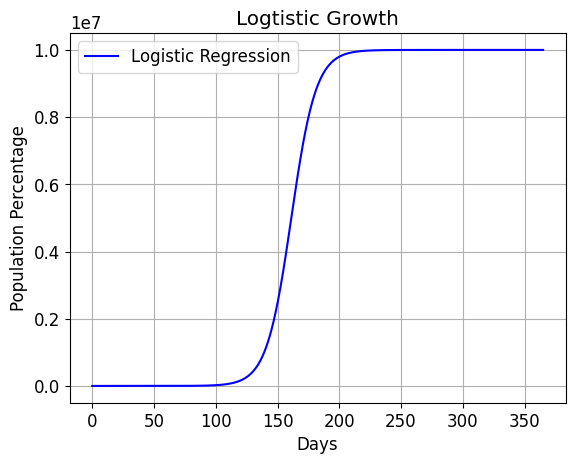

In [15]:
r=float(input(f'Enter 0.1, 1, or 10'))   #rate of change 0.1, 1, 10
Ntot = 10000000                            #Population of 10,000,000 people
params = [r,Ntot]
t = np.linspace(0,365,1000)              #365 days sliced 1000 times
y0=[1]

def logistic_growth(variables, t, params):
  N=variables[0]
  r=params[0]
  Ntot=params[1]
  dNdt=r*N*(1-N/Ntot)
  return np.array([dNdt])

y=odeint(logistic_growth,y0,t,args=(params,)) 

plt.plot(t,y[:,0], 'b-', label='Logistic Regression')
plt.title('Logtistic Growth')
plt.xlabel('Days')
plt.ylabel('Population Percentage')
plt.grid()
plt.legend() 
plt.show()

### b

In [2]:
r=float(input(f'Enter 0.1, 1, or 10'))   #rate of change 0.1, 1, 10
Ntot = 1000                           #Population of 10,000,000 people
params = [r,Ntot]
t = np.arange(0,366)  
print(t)            #365 days sliced 1000 times
y0=[1]
                                            #HELP
def logistic_growth(variables, t, params):
  N=variables[0]
  r=params[0]
  Ntot=params[1]
  x=N/Ntot
  dNdt=r*N*(1-x)
  return np.array([dNdt])

def exponential_growth(variables, t, params):
  # N=variables[0]
  N=10
  r=params[0]
  Ntot=params[1]
  x=N/Ntot
  PE=r*(1-x)
  dNdt=N*np.exp(r*t)
  return np.array([dNdt])

y1=odeint(logistic_growth,y0,t,args=(params,))
y2=odeint(exponential_growth,y0,t,args=(params,)) 

# plt.plot(t,y1[:,0], 'b-', label='Logistic Regression')
plt.plot(t,y2[:,0], 'r-', label='Exponential Function')
plt.title('Logtistic Growth vs. Exponential Growth')
plt.xlabel('Days')
plt.ylabel('Population Percentage')
plt.grid()
plt.legend() 
plt.show()

NameError: name 'np' is not defined